# Pymaceuticals Inc.
---

### Analysis

- 3 Observations:
    - Mice treated with Capomulin and Ramicane had significantly smaller sized tumors at the end of the study when compared to those  of Infubinol and Ceftamin.
    - There is a high correlation coefficient, 0.84, between mouse weight and average tumor size.
    - There was an even distribution between male and female mice tested leaving further analysis required to determine if the mouse sex impacts tumor volume for each drug regimen.
 

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Checking the number of mice.
len(merge_df['Mouse ID'].unique())

249

In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = merge_df[merge_df[['Mouse ID', 'Timepoint']].duplicated() == True]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [20]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice = merge_df[merge_df['Mouse ID'] == 'g989']
duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.loc[merge_df['Mouse ID'] != 'g989']
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_df = clean_df.set_index(['Drug Regimen'])
per_drug_mean = drug_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
per_drug_median = drug_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
per_drug_var = drug_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
per_drug_std = drug_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
per_drug_sem = drug_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

per_drug_summary = pd.DataFrame(
    {'mean': per_drug_mean,
    'median': per_drug_median,
    'var': per_drug_var,
    'std': per_drug_std,
    'sem': per_drug_sem
    })

per_drug_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_per_drug_summary = clean_df.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
agg_per_drug_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

AxesSubplot(0.125,0.11;0.775x0.77)


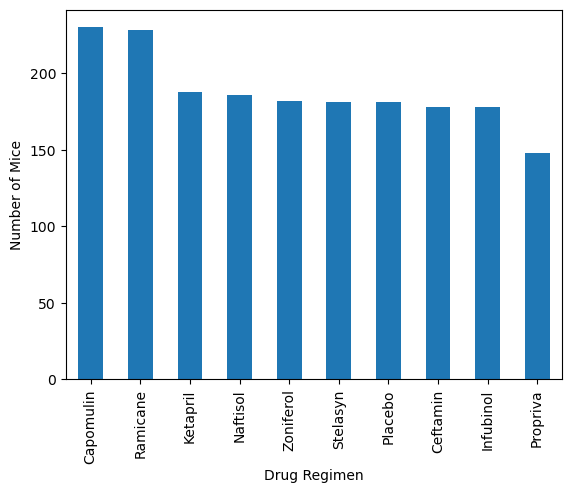

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
fig = clean_df['Drug Regimen'].value_counts().plot.bar()
fig.set_xlabel('Drug Regimen')
fig.set_ylabel('Number of Mice')
print(fig)


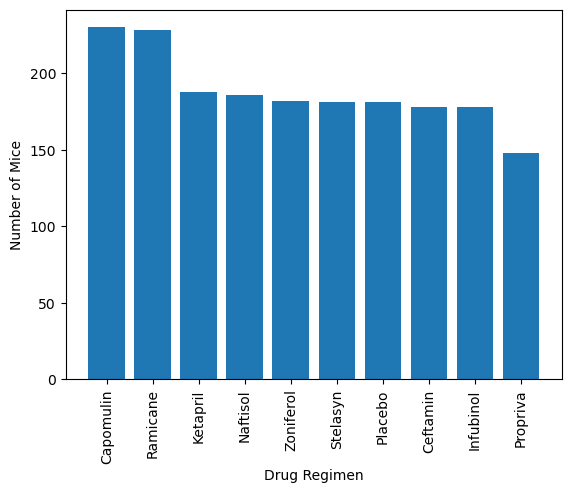

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(clean_df['Drug Regimen'].value_counts().index, clean_df['Drug Regimen'].value_counts().values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.xticks(rotation=90)
plt.show()

In [27]:
sex_distrubution_df = clean_df.groupby(['Drug Regimen', 'Mouse ID']).max().value_counts('Sex')
sex_distrubution_df

Sex
Male      125
Female    123
dtype: int64

AxesSubplot(0.22375,0.11;0.5775x0.77)


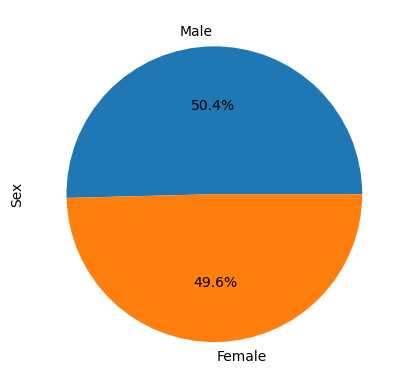

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fig = sex_distrubution_df.plot.pie(autopct='%1.1f%%')
fig.set_ylabel('Sex')
print(fig)

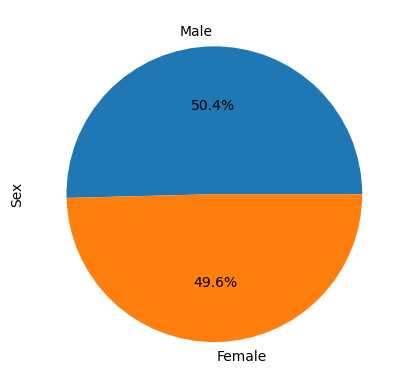

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_distrubution_df.values, labels=sex_distrubution_df.index, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_df = pd.merge(last_timepoint_df, clean_df, on=('Mouse ID', 'Timepoint'), how='left')

In [31]:
final_capomulin_df = final_tumor_df[final_tumor_df['Drug Regimen'] == 'Capomulin']
final_ramicane_df = final_tumor_df[final_tumor_df['Drug Regimen'] == 'Ramicane']
final_infubinol_df = final_tumor_df[final_tumor_df['Drug Regimen'] == 'Infubinol']
final_ceftamin_df = final_tumor_df[final_tumor_df['Drug Regimen'] == 'Ceftamin']

In [53]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = [final_capomulin_df, final_ramicane_df, final_infubinol_df, final_ceftamin_df]

for treatment in treatments:
    drug_name = treatment['Drug Regimen'].unique()[0]
    quartiles = treatment['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier_list = treatment.loc[(treatment['Tumor Volume (mm3)'] < lower_bound) | (treatment['Tumor Volume (mm3)'] > upper_bound), 'Tumor Volume (mm3)']
    if len(outlier_list) == 0:
        outlier_list = 'None'
    else:
        outlier_list = outlier_list.values[0].round(2)
    print(f"{drug_name}'s potential outliers: {outlier_list}.")


Capomulin's potential outliers: None.
Ramicane's potential outliers: None.
Infubinol's potential outliers: 36.32.
Ceftamin's potential outliers: None.


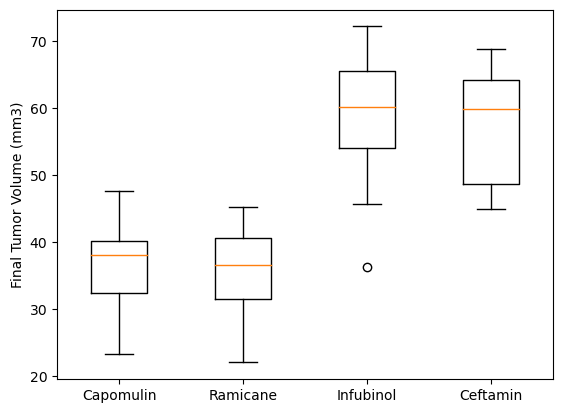

In [48]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = [final_capomulin_df['Tumor Volume (mm3)'], final_ramicane_df['Tumor Volume (mm3)'], final_infubinol_df['Tumor Volume (mm3)'], final_ceftamin_df['Tumor Volume (mm3)']]
drug_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
fig1, ax1 = plt.subplots()
ax1.boxplot(treatments, labels=drug_names)
ax1.set_ylabel('Final Tumor Volume (mm3)')

plt.show()


## Line and Scatter Plots

In [37]:
mouse_l509 = clean_df.loc[clean_df['Mouse ID'] == 'l509']
mouse_l509

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


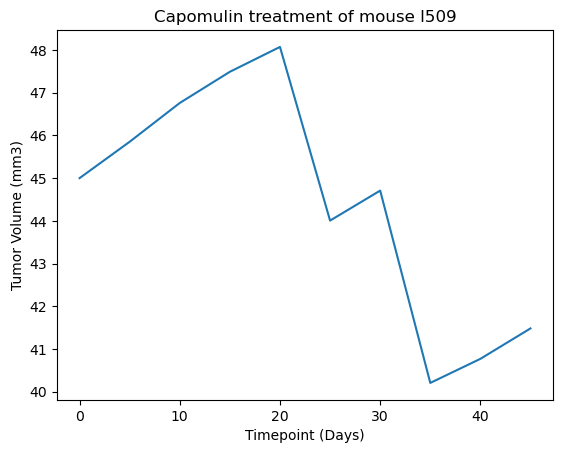

In [49]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(mouse_l509['Timepoint'], mouse_l509['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse l509')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (Days)')
plt.show()

In [40]:
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [41]:
capomulin_grouped_df = capomulin_df.groupby('Mouse ID').agg('mean')[['Weight (g)', 'Tumor Volume (mm3)']]
capomulin_grouped_df

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


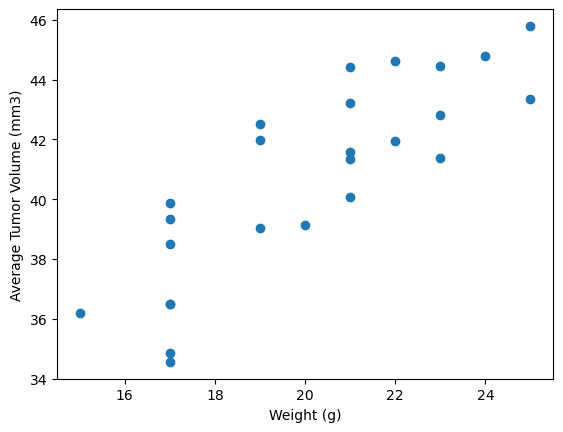

In [50]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(capomulin_grouped_df['Weight (g)'], capomulin_grouped_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

In [45]:
from scipy.stats import linregress

The correlation between mouse weight and the average tumor volume is 0.84


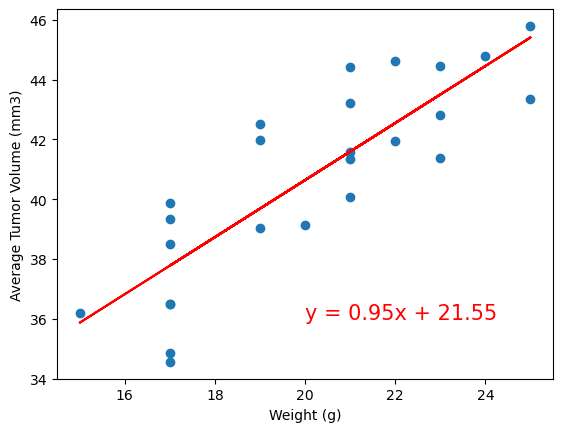

<Figure size 500x600 with 0 Axes>

In [52]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_grouped_df['Weight (g)'], capomulin_grouped_df['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values = capomulin_grouped_df['Weight (g)']
y_values = capomulin_grouped_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.figure(figsize=(5,6))
plt.show()